# Tosha Khana Data Analysis

This notebook analyzes the Tosha Khana dataset, which contains records of gifts received by public officials. The goal is to explore patterns in gift types, recipients, valuation, and compliance over time.


In [ ]:

import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(r'properties.csv')


In [ ]:
df['society'].value_counts()


In [ ]:
df.isnull().sum()

title             0
price             0
location          0
society           0
bedrooms        209
bathrooms       210
size              0
rating          964
url               0
contact_info      0
description       0
listing_date      0
source_file       0
dtype: int64

In [ ]:
df['price'] = df['price'].str.replace('PKR ', '', regex=False)
# # df['price'] = df['price'].str.replace('Lakh', '', regex=False)
# # df['price'] = df['price'].str.replace('Crore', '', regex=False)


In [ ]:
# df['price']
# 

0       3.65 Crore
1       3.15 Crore
2        2.8 Crore
3        2.3 Crore
4        2.5 Crore
           ...    
1242       6 Crore
1243       2 Crore
1244     2.1 Crore
1245     2.3 Crore
1246     4.2 Crore
Name: price, Length: 1247, dtype: object

In [ ]:
# def converter(x):
#     # Handle empty/null values
    
#     # Convert to string and clean it up
#     text = str(x).strip().lower()
    
#     # Split by comma or space
#     parts = text.replace(',', ' ').split()
    
#     # Get the number (first part)
#     try:
#         number = float(parts[0])
#     except:
#         return 0.0
    
#     # Check if it has lakh or crore
#     if len(parts) > 1:
#         unit = parts[1]
#         if 'lakh' in unit:
#             return round(number / 100, 2)  # Convert lakh to crore
#         elif 'crore' in unit:
#             return round(number, 2)
    
#     # Just a plain number
#     return round(number, 2)

In [ ]:
# df['price'] = df['price'].apply(converter)

In [ ]:
# df

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html
1,10 Marla House For Sale Near 50 Feet Wide Road...,3.15,"Wapda City, Faisalabad",Faisalabad,5.0,5.0,10 Marla,NaN,https://www.zameen.com/Property/faisalabad_wap...,"Phone Available, WhatsApp Available, Email Ava...","10 Marla House for Sale WAPDA City,",Added: 1 day ago,house-10.html
2,5 Marla Ultra Modern Designer House For Sale I...,2.80,"Eden Valley, Faisalabad",Faisalabad,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Ultra Modern Designer House,Added: 2 days ago,house-100.html
3,5 Mala Brand New Luxurious House For Sale. . . .,2.30,"Eden Executive, Eden Gardens",Eden Gardens,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/eden_gardens_e...,"Phone Available, WhatsApp Available, Email Ava...",LUXURY HOME SERIES\n 5 Mala Brand Ne,Added: 1 month ago,house-1000.html
4,Brand New Vip Luxury Designer House,2.50,"Eden Orchard, Faisalabad",Faisalabad,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",Drawning Store 2 Kitchen Store Big,Added: 1 month ago,house-1001.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,10 Marla Brand New House Available For Sale ...,6.00,"Abdullah Gardens, East Canal Road",East Canal Road,4.0,5.0,10 Marla,NaN,https://www.zameen.com/Property/east_canal_roa...,"Phone Available, Email Available",Brand New House\n Gated Society\n Bes,Added: 1 month ago,house-995.html
1243,4 Marla Double Story New House For sala,2.00,"Mannan Town, Faisalabad",Faisalabad,4.0,4.0,4 Marla,Titanium,https://www.zameen.com/Property/faisalabad_man...,"Phone Available, WhatsApp Available, Email Ava...",24 Security \n underground,Added: 1 month ago,house-996.html
1244,5 Marla Luxurious Brand New Beautiful House Av...,2.10,"Model City 1, Canal Road",Canal Road,4.0,5.0,5 Marla,NaN,https://www.zameen.com/Property/canal_road_mod...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Beautiful Brand New House A,Added: 1 month ago,house-997.html
1245,Eden Garden Society Boundary Wall Canal Road F...,2.30,"Eden Gardens, Faisalabad",Faisalabad,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",( FOR SALE )\n *Eden Garden Society,Added: 1 month ago,house-998.html


In [ ]:
# df['society'].replace('Faisalabad', 'inside Faisalabad', inplace=True)
# df['society'].value_counts()

society
inside Faisalabad                         688
Citi Housing                               86
Wapda City                                 82
Canal Road                                 65
Eden Gardens                               58
Satiana Road                               52
East Canal Road                            45
Citi Housing Sargodha Road                 28
Jaranwala Road                             25
Samundari Road                             19
Citi Housing Samundri Road                 11
Rehman Gardens                             10
Eden Valley                                 8
Lower Canal Road                            7
TECH Town (TNT Colony)                      5
Canal Expressway                            5
Lahore - Sheikhupura - Faisalabad Road      4
Sargodha Road                               4
Gulistan Colony No 1                        4
Eden Orchard                                4
Four Seasons Phase 2                        3
Gulshan e Madina          

In [ ]:
# df.isnull().sum()*100/len(df)

title            0.000000
price            0.000000
location         0.000000
society          0.000000
bedrooms        16.760225
bathrooms       16.840417
size             0.000000
rating          77.305533
url              0.000000
contact_info     0.000000
description      0.000000
listing_date     0.000000
source_file      0.000000
dtype: float64

In [ ]:
# df['rating']=df['rating'].fillna('N/A')
# df['rating'].value_counts()

rating
N/A         964
Titanium    283
Name: count, dtype: int64

In [ ]:
# df[df['price']==0.22]

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file
1220,House For Sell Gulshan E Yousuf Millat Road Fsd,0.22,"Millat Road, Faisalabad",inside Faisalabad,1.0,1.0,2 Marla,N/A,https://www.zameen.com/Property/faisalabad_mil...,"Phone Available, WhatsApp Available, Email Ava...",One Owner Name\n 1 Bed 1 Bath\n Elect,Added: 1 month ago,house-975.html


In [ ]:

sns.barplot(df['price'])

In [ ]:
df['bedrooms'].max()


11.0

In [ ]:
df[df['bedrooms']==11.0]


,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file
376,EXTRA LARGE 23 MARLA CORNER HOUSE (GRAY STRUCT...,8.5,"Divine Enclave, Canal Road",Canal Road,11.0,7.0,1.2 Kanal,N/A,https://www.zameen.com/Property/canal_road_div...,"Phone Available, WhatsApp Available, Email Ava...",23 Marla House For Sale Divine Encl,Added: 4 days ago,house-214.html


In [ ]:
df.isnull().sum()

title             0
price             0
location          0
society           0
bedrooms        209
bathrooms       210
size              0
rating            0
url               0
contact_info      0
description       0
listing_date      0
source_file       0
dtype: int64

In [ ]:
df[df['bedrooms'].isnull()]['size'].value_counts().sum()

209

In [ ]:
# Marla list
marla_list = [
    "3 Marla",
    "3.5 Marla",
    "4 Marla",
    "5 Marla",
    "6 Marla",
    "7 Marla",
    "7.5 Marla",
    "8 Marla",
    "9 Marla",
    "10 Marla",
    "12 Marla",
    "15 Marla",
    "1.4 Marla",
    "2.5 Marla",
    "2 Marla"
]

# Kanal list
kanal_list = [
    "1 Kanal",
    "1.1 Kanal",
    "2 Kanal",
]

# Merge both lists
all_sizes = marla_list + kanal_list



In [ ]:
for i in range(len(all_sizes)):
    mode_value = df[df['size'] == f'{all_sizes[i]}']['bedrooms'].mode()

    # Handle case where mode might be empty or have multiple values
    if len(mode_value) > 0:
        mode_val = mode_value.iloc[0]  # Take first mode if multiple
        # Fill null values only where size is '5 Marla'
        df.loc[(df['size'] == f'{all_sizes[i]}') & (df['bedrooms'].isna()), 'bedrooms'] = mode_val

In [ ]:
for i in range(len(all_sizes)):
    mode_value = df[df['size'] == f'{all_sizes[i]}']['bathrooms'].mode()
    

    # Handle case where mode might be empty or have multiple values
    if len(mode_value) > 0:
        mode_val = mode_value.iloc[0]  # Take first mode if multiple
        # Fill null values only where size is '5 Marla'
        df.loc[(df['size'] == f'{all_sizes[i]}') & (df['bathrooms'].isna()), 'bathrooms'] = mode_val

In [ ]:
# df

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html
1,10 Marla House For Sale Near 50 Feet Wide Road...,3.15,"Wapda City, Faisalabad",inside Faisalabad,5.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/faisalabad_wap...,"Phone Available, WhatsApp Available, Email Ava...","10 Marla House for Sale WAPDA City,",Added: 1 day ago,house-10.html
2,5 Marla Ultra Modern Designer House For Sale I...,2.80,"Eden Valley, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Ultra Modern Designer House,Added: 2 days ago,house-100.html
3,5 Mala Brand New Luxurious House For Sale. . . .,2.30,"Eden Executive, Eden Gardens",Eden Gardens,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/eden_gardens_e...,"Phone Available, WhatsApp Available, Email Ava...",LUXURY HOME SERIES\n 5 Mala Brand Ne,Added: 1 month ago,house-1000.html
4,Brand New Vip Luxury Designer House,2.50,"Eden Orchard, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",Drawning Store 2 Kitchen Store Big,Added: 1 month ago,house-1001.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,10 Marla Brand New House Available For Sale ...,6.00,"Abdullah Gardens, East Canal Road",East Canal Road,4.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/east_canal_roa...,"Phone Available, Email Available",Brand New House\n Gated Society\n Bes,Added: 1 month ago,house-995.html
1243,4 Marla Double Story New House For sala,2.00,"Mannan Town, Faisalabad",inside Faisalabad,4.0,4.0,4 Marla,Titanium,https://www.zameen.com/Property/faisalabad_man...,"Phone Available, WhatsApp Available, Email Ava...",24 Security \n underground,Added: 1 month ago,house-996.html
1244,5 Marla Luxurious Brand New Beautiful House Av...,2.10,"Model City 1, Canal Road",Canal Road,4.0,5.0,5 Marla,N/A,https://www.zameen.com/Property/canal_road_mod...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Beautiful Brand New House A,Added: 1 month ago,house-997.html
1245,Eden Garden Society Boundary Wall Canal Road F...,2.30,"Eden Gardens, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",( FOR SALE )\n *Eden Garden Society,Added: 1 month ago,house-998.html


In [ ]:
df.isnull().sum()

title           0
price           0
location        0
society         0
bedrooms        5
bathrooms       5
size            0
rating          0
url             0
contact_info    0
description     0
listing_date    0
source_file     0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

title           0
price           0
location        0
society         0
bedrooms        0
bathrooms       0
size            0
rating          0
url             0
contact_info    0
description     0
listing_date    0
source_file     0
dtype: int64

In [ ]:


feature_keywords = {
    "modern": 8,
    "luxury": 8,
    "luxurious": 8,
    "big": 7,
    "spacious": 8,
    "designer": 8,
    "brand new": 7,
    "vip": 9,
    "beautiful": 7,
    "furnished": 8,
    "double story": 5,
    "triple story": 5,
    "investment": 6,
    "security": 8,
    "security system": 8,
    "corner House": 6,
    "Dream Location":7,
    "Gas":5,
    "Electricity":4
    
}

# Extract features function
def extract_features(text):
    features = []
    text_lower = str(text).lower()
    for word in feature_keywords.keys():
        if word in text_lower:
            features.append(word)
    # Agar features empty hain to ["average"] return kare
    return features if features else ["average"]

# Calculate rating function
def calculate_rating(features):
    if features == ["average"]:  
        return 5   # default/neutral rating
    score = sum(feature_keywords[f] for f in features)
    return min(10, max(1, round(score / len(features))))

# Apply functions
df["house_features"] = df["description"].apply(extract_features)
df["feature_rating"] = df["house_features"].apply(calculate_rating)




In [22]:
# df


In [ ]:
df['society'].value_counts()

society
inside Faisalabad                         683
Citi Housing                               86
Wapda City                                 82
Canal Road                                 65
Eden Gardens                               58
Satiana Road                               52
East Canal Road                            45
Citi Housing Sargodha Road                 28
Jaranwala Road                             25
Samundari Road                             19
Citi Housing Samundri Road                 11
Rehman Gardens                             10
Eden Valley                                 8
Lower Canal Road                            7
TECH Town (TNT Colony)                      5
Canal Expressway                            5
Lahore - Sheikhupura - Faisalabad Road      4
Sargodha Road                               4
Gulistan Colony No 1                        4
Eden Orchard                                4
Four Seasons Phase 2                        3
Gulshan e Madina          

In [23]:
# df[df['society']=='Lahore - Sheikhupura - Faisalabad Road']

In [ ]:
df['society'].value_counts()

society
inside Faisalabad                         683
Citi Housing                               86
Wapda City                                 82
Canal Road                                 65
Eden Gardens                               58
Satiana Road                               52
East Canal Road                            45
Citi Housing Sargodha Road                 28
Jaranwala Road                             25
Samundari Road                             19
Citi Housing Samundri Road                 11
Rehman Gardens                             10
Eden Valley                                 8
Lower Canal Road                            7
TECH Town (TNT Colony)                      5
Canal Expressway                            5
Lahore - Sheikhupura - Faisalabad Road      4
Sargodha Road                               4
Gulistan Colony No 1                        4
Eden Orchard                                4
Four Seasons Phase 2                        3
Gulshan e Madina          

In [ ]:



excluded_phrases = [
    "inside Faisalabad"
]

society_indicators = [
    "city","villas","villa","valley","wapda","phase","enclave","garden","gardens",
    "heights","estate","housing","town","township","residency","residence","block",
    "sector","park","apartments","apartment","colony","scheme","resort","orchard",
    "farmhouse","farmhouses","corner","heights","street","drive","court","line",'Citi Housing'
]

def normalize_name(name):
    name = name.strip(" -,:;")
    name = re.sub(r"\s+", " ", name)
    titled = name.title()
    # preserve common acronyms
    titled = re.sub(r"\bWapda\b", "WAPDA", titled, flags=re.I)
    titled = re.sub(r"\bLda\b", "LDA", titled, flags=re.I)
    titled = re.sub(r"\bCda\b", "CDA", titled, flags=re.I)
    titled = re.sub(r"^\b(The|In|At)\b\s+", "", titled, flags=re.I)
    return titled.strip()

def extract_society(location):
    if not isinstance(location, str):
        return ""
    s = location.strip()
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"\([^)]*\)", "", s)  # remove parentheses content
    # remove excluded phrases (case-insensitive)
    for phrase in excluded_phrases:
        s = re.sub(re.escape(phrase), " ", s, flags=re.I)
    # split on many separators and connective words
    s = re.sub(r"[,/\\\-–—]| near to | near | opposite to | opposite | in front of | by | on | at | beside | next to ", " | ", s, flags=re.I)
    s = re.sub(r"\s*\|\s*", "|", s).strip("| ")
    s = re.sub(r"\s+", " ", s)
    parts = [p.strip() for p in s.split("|") if p.strip()]
    lower_parts = [p.lower() for p in parts]

    # prefer part that contains a society indicator
    for idx, lp in enumerate(lower_parts):
        for ind in society_indicators:
            if re.search(r"\b" + re.escape(ind) + r"\b", lp):
                return normalize_name(parts[idx])

    # fallback: longest meaningful part (avoid returning just city names)
    if parts:
        candidate = max(parts, key=lambda x: len(x))
        if re.fullmatch(r"(lahore|faisalabad|sheikhupura|pakistan|punjab)", candidate.strip(), flags=re.I):
            return ""
        return normalize_name(candidate)
    return ""


df['society_extracted'] = df['location'].astype(str).apply(extract_society)


In [ ]:
df

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file,house_features,feature_rating,society_extracted
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html,[investment],6,WAPDA City
1,10 Marla House For Sale Near 50 Feet Wide Road...,3.15,"Wapda City, Faisalabad",inside Faisalabad,5.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/faisalabad_wap...,"Phone Available, WhatsApp Available, Email Ava...","10 Marla House for Sale WAPDA City,",Added: 1 day ago,house-10.html,[average],5,WAPDA City
2,5 Marla Ultra Modern Designer House For Sale I...,2.80,"Eden Valley, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Ultra Modern Designer House,Added: 2 days ago,house-100.html,"[modern, designer]",8,Eden Valley
3,5 Mala Brand New Luxurious House For Sale. . . .,2.30,"Eden Executive, Eden Gardens",Eden Gardens,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/eden_gardens_e...,"Phone Available, WhatsApp Available, Email Ava...",LUXURY HOME SERIES\n 5 Mala Brand Ne,Added: 1 month ago,house-1000.html,[luxury],8,Eden Gardens
4,Brand New Vip Luxury Designer House,2.50,"Eden Orchard, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",Drawning Store 2 Kitchen Store Big,Added: 1 month ago,house-1001.html,[big],7,Eden Orchard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,10 Marla Brand New House Available For Sale ...,6.00,"Abdullah Gardens, East Canal Road",East Canal Road,4.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/east_canal_roa...,"Phone Available, Email Available",Brand New House\n Gated Society\n Bes,Added: 1 month ago,house-995.html,[brand new],7,Abdullah Gardens
1243,4 Marla Double Story New House For sala,2.00,"Mannan Town, Faisalabad",inside Faisalabad,4.0,4.0,4 Marla,Titanium,https://www.zameen.com/Property/faisalabad_man...,"Phone Available, WhatsApp Available, Email Ava...",24 Security \n underground,Added: 1 month ago,house-996.html,[security],8,Mannan Town
1244,5 Marla Luxurious Brand New Beautiful House Av...,2.10,"Model City 1, Canal Road",Canal Road,4.0,5.0,5 Marla,N/A,https://www.zameen.com/Property/canal_road_mod...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Beautiful Brand New House A,Added: 1 month ago,house-997.html,"[brand new, beautiful]",7,Model City 1
1245,Eden Garden Society Boundary Wall Canal Road F...,2.30,"Eden Gardens, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",( FOR SALE )\n *Eden Garden Society,Added: 1 month ago,house-998.html,[average],5,Eden Gardens


In [ ]:
df['society_extracted'].value_counts()

society_extracted
WAPDA City                    132
Eden Orchard                   87
Eden Valley                    80
Citi Housing Samundri Road     65
Canal Road                     63
                             ... 
Nishatabad                      1
Prime City                      1
Younas Town                     1
Lawyers Housing Society         1
Mannan Town                     1
Name: count, Length: 131, dtype: int64

In [ ]:
d=df[df['society_extracted']=='']
df.drop(d.index,inplace=True)

In [ ]:
# df[df['society']=='Canal Road']['society_extracted'].value_counts().sum()

65

In [ ]:
MARLA_TO_SQFT = 272.25
KANAL_TO_SQFT = 5445.0

def convert_size_to_sqft(size_str):
    """Convert size string (Marla/Kanal) to square feet."""
    if pd.isna(size_str):
        return None
    size_str = size_str.strip().lower()
    
    # Extract numeric value and unit
    match = re.match(r"([\d.]+)\s*(marla|mala|kanal)", size_str)
    if match:
        value, unit = match.groups()
        value = float(value)
        if unit in ["marla", "mala"]:  # handle both spellings
            return value * MARLA_TO_SQFT
        elif unit == "kanal":
            return value * KANAL_TO_SQFT
    return None

# Load dataset

# Apply conversion
df["size_sqft"] = df["size"].apply(convert_size_to_sqft)


In [ ]:
df.head(1)

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file,house_features,feature_rating,society_extracted,size_sqft
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html,[investment],6,WAPDA City,2722.5


In [ ]:
def calculate_rating(feature):
    if feature <= 5:
        return "Low"
    elif feature <= 7:
        return "Medium"
    elif feature <= 9:
        return "High"
    else:
        return "Undefined"


In [ ]:

# df

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file,house_features,feature_rating,society_extracted,size_sqft
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html,[investment],6,WAPDA City,2722.50
1,10 Marla House For Sale Near 50 Feet Wide Road...,3.15,"Wapda City, Faisalabad",inside Faisalabad,5.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/faisalabad_wap...,"Phone Available, WhatsApp Available, Email Ava...","10 Marla House for Sale WAPDA City,",Added: 1 day ago,house-10.html,[average],5,WAPDA City,2722.50
2,5 Marla Ultra Modern Designer House For Sale I...,2.80,"Eden Valley, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Ultra Modern Designer House,Added: 2 days ago,house-100.html,"[modern, designer]",8,Eden Valley,1361.25
3,5 Mala Brand New Luxurious House For Sale. . . .,2.30,"Eden Executive, Eden Gardens",Eden Gardens,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/eden_gardens_e...,"Phone Available, WhatsApp Available, Email Ava...",LUXURY HOME SERIES\n 5 Mala Brand Ne,Added: 1 month ago,house-1000.html,[luxury],8,Eden Gardens,1361.25
4,Brand New Vip Luxury Designer House,2.50,"Eden Orchard, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",Drawning Store 2 Kitchen Store Big,Added: 1 month ago,house-1001.html,[big],7,Eden Orchard,1361.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,10 Marla Brand New House Available For Sale ...,6.00,"Abdullah Gardens, East Canal Road",East Canal Road,4.0,5.0,10 Marla,N/A,https://www.zameen.com/Property/east_canal_roa...,"Phone Available, Email Available",Brand New House\n Gated Society\n Bes,Added: 1 month ago,house-995.html,[brand new],7,Abdullah Gardens,2722.50
1243,4 Marla Double Story New House For sala,2.00,"Mannan Town, Faisalabad",inside Faisalabad,4.0,4.0,4 Marla,Titanium,https://www.zameen.com/Property/faisalabad_man...,"Phone Available, WhatsApp Available, Email Ava...",24 Security \n underground,Added: 1 month ago,house-996.html,[security],8,Mannan Town,1089.00
1244,5 Marla Luxurious Brand New Beautiful House Av...,2.10,"Model City 1, Canal Road",Canal Road,4.0,5.0,5 Marla,N/A,https://www.zameen.com/Property/canal_road_mod...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Beautiful Brand New House A,Added: 1 month ago,house-997.html,"[brand new, beautiful]",7,Model City 1,1361.25
1245,Eden Garden Society Boundary Wall Canal Road F...,2.30,"Eden Gardens, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,N/A,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",( FOR SALE )\n *Eden Garden Society,Added: 1 month ago,house-998.html,[average],5,Eden Gardens,1361.25


In [ ]:
df.to_csv('recomandation_model.csv', index=False)

In [ ]:
train_df=df.drop(columns=['title','location','society','url','contact_info',"house_features",'source_file','listing_date','description','feature_rating','rating','size',])

In [ ]:
train_df

,price,bedrooms,bathrooms,society_extracted,size_sqft
0,3.65,4.0,5.0,WAPDA City,2722.50
1,3.15,5.0,5.0,WAPDA City,2722.50
2,2.80,3.0,4.0,Eden Valley,1361.25
3,2.30,3.0,4.0,Eden Gardens,1361.25
4,2.50,3.0,4.0,Eden Orchard,1361.25
...,...,...,...,...,...
1242,6.00,4.0,5.0,Abdullah Gardens,2722.50
1243,2.00,4.0,4.0,Mannan Town,1089.00
1244,2.10,4.0,5.0,Model City 1,1361.25
1245,2.30,3.0,4.0,Eden Gardens,1361.25


In [ ]:
dat_label_encode=train_df.copy()
categorical_cols=train_df.select_dtypes(include=['object']).columns

for cols in categorical_cols:
    oe=OrdinalEncoder()
    dat_label_encode[cols]=oe.fit_transform(dat_label_encode[[cols]])
    print(oe.categories_)

[array(['204 Chak Road', 'Abdullah Garden', 'Abdullah Gardens',
       'Abdullahpur', 'Afghanabad 1', 'Al Barkat Villas',
       'Al Najaf Colony', 'Al Noor Garden', 'Ali Garden',
       'Allama Iqbal Colony', 'Ameen Park', 'Batala Colony',
       'Bilal Garden', 'Bismillah Garden', 'Bukhari Town',
       'Canal Expressway', 'Canal Garden', 'Canal Road', 'Canal Valley',
       'Canal Villas', 'Chak 208 Road', 'Chenab Gardens', 'Citi Housing',
       'Citi Housing Phase 2 Sargodha Road', 'Citi Housing Samundri Road',
       'Citi Housing Sargodha Road', 'City Villas Housing Scheme',
       'Civil Lines', 'Divine Enclave', 'Eden Garden', 'Eden Gardens',
       'Eden Orchard', 'Eden Orchard Block X', 'Eden Orchard Block Z',
       'Eden Valley', 'Faisal Gardens', 'Faisalabad Road', 'Fda City',
       'Four Season Housing', 'Four Seasons Phase 1',
       'Four Seasons Phase 2', 'Garden Colony', 'Ghalib City',
       'Ghalib City Block A', 'Ghulam Mohammad Abad', 'Green Orchard',
       'Gr

In [ ]:
X_label=dat_label_encode.drop(columns=['price'])
y_label=dat_label_encode['price']

In [ ]:
X_label

,bedrooms,bathrooms,society_extracted,size_sqft
0,4.0,5.0,127.0,2722.50
1,5.0,5.0,127.0,2722.50
2,3.0,4.0,34.0,1361.25
3,3.0,4.0,30.0,1361.25
4,3.0,4.0,31.0,1361.25
...,...,...,...,...
1242,4.0,5.0,2.0,2722.50
1243,4.0,4.0,80.0,1089.00
1244,4.0,5.0,86.0,1361.25
1245,3.0,4.0,30.0,1361.25


<Axes: >

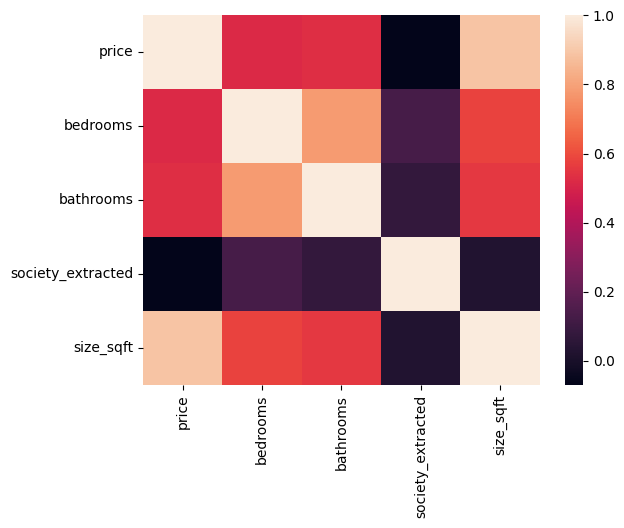

In [ ]:
sns.heatmap(dat_label_encode.corr())

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

fi_pd=pd.DataFrame()
fi_pd['feature']=X_label.columns
fi_pd['importance']=rf.feature_importances_
fi_pd.sort_values(by='importance',ascending=False)

,feature,importance
3,size_sqft,0.879916
2,society_extracted,0.079856
0,bedrooms,0.026496
1,bathrooms,0.013732


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor()
gb.fit(X_label,y_label)

fi_pd2=pd.DataFrame()
fi_pd2['feature']=X_label.columns
fi_pd2['importance']=rf.feature_importances_
fi_pd2.sort_values(by='importance',ascending=False)

,feature,importance
3,size_sqft,0.879916
2,society_extracted,0.079856
0,bedrooms,0.026496
1,bathrooms,0.013732


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_label,y_label,test_size=0.2,random_state=42)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

result=permutation_importance(rf,x_test,y_test,n_repeats=30,random_state=42,n_jobs=-1)

fi_df3=pd.DataFrame()
fi_df3['feature']=X_label.columns
fi_df3['importance']=result.importances_mean
fi_df3.sort_values(by='importance',ascending=False)

,feature,importance
3,size_sqft,1.482606
2,society_extracted,0.083069
0,bedrooms,0.031261
1,bathrooms,0.012712


In [ ]:
# dfi=dat_label_encode.copy()

In [ ]:
# dfi

,price,bedrooms,bathrooms,society_extracted,size_sqft
0,3.65,4.0,5.0,127.0,2722.50
1,3.15,5.0,5.0,127.0,2722.50
2,2.80,3.0,4.0,34.0,1361.25
3,2.30,3.0,4.0,30.0,1361.25
4,2.50,3.0,4.0,31.0,1361.25
...,...,...,...,...,...
1242,6.00,4.0,5.0,2.0,2722.50
1243,2.00,4.0,4.0,80.0,1089.00
1244,2.10,4.0,5.0,86.0,1361.25
1245,2.30,3.0,4.0,30.0,1361.25


In [ ]:

dfi = dat_label_encode.copy()
X = dfi.drop(columns=['price'])
y = dfi['price']
y_transformed = np.log1p(y)

In [ ]:
X

,bedrooms,bathrooms,society_extracted,size_sqft
0,4.0,5.0,127.0,2722.50
1,5.0,5.0,127.0,2722.50
2,3.0,4.0,34.0,1361.25
3,3.0,4.0,30.0,1361.25
4,3.0,4.0,31.0,1361.25
...,...,...,...,...
1242,4.0,5.0,2.0,2722.50
1243,4.0,4.0,80.0,1089.00
1244,4.0,5.0,86.0,1361.25
1245,3.0,4.0,30.0,1361.25


In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
# Linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Support Vector Machines
from sklearn.svm import SVR

# Decision Trees and Ensembles
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)

# Neural Networks
from sklearn.neural_network import MLPRegressor

# XGBoost
from xgboost import XGBRegressor



In [ ]:
col_endcode=['society_extracted','feature_category']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms','bathrooms','size_sqft']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), col_endcode)
    ], 
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', GradientBoostingRegressor())
])

In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
print(f"Cross-validation R² scores: Mean={scores.mean():.4f}, Std={scores.std():.4f}")


In [ ]:
scores.mean(),scores.std()

(0.8990256278992785, 0.02583773837192626)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Test R² score: {pipeline.score(X_test, y_test):.4f}")

Test R² score: 0.8652


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('gb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred = np.expm1(y_pred)

In [ ]:
mean_absolute_error(np.expm1(y_test),y_pred)

0.766913663494426

In [ ]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output
    

In [ ]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
    'xgboost':XGBRegressor()
}

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [ ]:
model_output

[['linear_reg', 0.7936073310965952, 1.0523892890324786],
 ['svr', 0.5781150637124577, 1.5324336656696833],
 ['ridge', 0.7936241042159706, 1.0529252381211394],
 ['LASSO', -0.00872389050627489, 2.0824875287591653],
 ['decision tree', 0.899640411192372, 0.698001807999418],
 ['random forest', 0.9193243568960178, 0.6989297266101936],
 ['extra trees', 0.9183517904032925, 0.6360854612431693],
 ['gradient boosting', 0.8995387987499684, 0.7665677959550516],
 ['adaboost', 0.8427340286136278, 0.9445890017613273],
 ['mlp', 0.8331712375279843, 1.016286627604057],
 ['xgboost', 0.9170758801324854, 0.6924070852005529]]

In [ ]:
X

,bedrooms,bathrooms,society_extracted,size_sqft,feature_category
0,4.0,5.0,127.0,2722.50,2.0
1,5.0,5.0,127.0,2722.50,1.0
2,3.0,4.0,34.0,1361.25,0.0
3,3.0,4.0,30.0,1361.25,0.0
4,3.0,4.0,31.0,1361.25,2.0
...,...,...,...,...,...
1242,4.0,5.0,2.0,2722.50,2.0
1243,4.0,4.0,80.0,1089.00,0.0
1244,4.0,5.0,86.0,1361.25,2.0
1245,3.0,4.0,30.0,1361.25,1.0


In [ ]:
columns_to_encode=['bedrooms','bathrooms','size_sqft','feature_category']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'size_sqft','society_extracted','feature_category']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columns_to_encode),
        ('cat1',OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False),['society_extracted'])
    ], 
    remainder='passthrough'
)

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')


In [ ]:
scores.mean(),scores.std()

(0.8903484466562841, 0.05117624458697337)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [ ]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred = np.expm1(y_pred)


In [ ]:
mean_absolute_error(np.expm1(y_test),y_pred)

0.7778594628688736

In [ ]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [ ]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

,name,r2,mae
6,extra trees,0.927509,0.640256
10,xgboost,0.938670,0.648177
5,random forest,0.926826,0.673550
9,mlp,0.919213,0.689852
4,decision tree,0.907741,0.706783
7,gradient boosting,0.908788,0.753569
2,ridge,0.909072,0.776501
0,linear_reg,0.890348,0.777859
1,svr,0.847548,0.903284
8,adaboost,0.833025,0.984855


In [ ]:
import category_encoders as ce

columns_to_encode=['bedrooms','bathrooms','size_sqft','feature_category']

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'size_sqft','society_extracted','feature_category']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columns_to_encode),
        # ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
        ('target_enc', ce.TargetEncoder(), ['society_extracted'])
    ], 
    remainder='passthrough')

In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [ ]:
scores.mean(),scores.std()

(0.8381008312499736, 0.02721943082007341)

In [ ]:
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    y_pred = np.expm1(y_pred)
    
    output.append(mean_absolute_error(np.expm1(y_test),y_pred))
    
    return output

In [ ]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [ ]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['mae'])

,name,r2,mae
6,extra trees,0.927509,0.640256
10,xgboost,0.938670,0.648177
5,random forest,0.926826,0.673550
9,mlp,0.919213,0.689852
4,decision tree,0.907741,0.706783
7,gradient boosting,0.908788,0.753569
2,ridge,0.909072,0.776501
0,linear_reg,0.890348,0.777859
1,svr,0.847548,0.903284
8,adaboost,0.833025,0.984855


In [ ]:

import category_encoders as ce

columns_to_encode=['bedrooms','bathrooms','size_sqft','feature_category']

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'size_sqft','society_extracted','feature_category']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columns_to_encode),
        # ('cat1',OneHotEncoder(drop='first',sparse_output=False),['agePossession']),
        ('target_enc', ce.TargetEncoder(), ['society_extracted'])
    ], 
    remainder='passthrough')
    
pipeline = Pipeline([
('preprocessor', preprocessor),
('regressor',XGBRegressor())
])
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

# print((scores.mean())

X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

y_pred = np.expm1(y_pred)

scores_mea=mean_absolute_error(np.expm1(y_test),y_pred)

print(scores_mea)


0.6631725585895027


In [ ]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from scipy.stats import uniform, randint

# Preprocessing
columns_to_encode = ['bedrooms', 'bathrooms', 'size_sqft', 'feature_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'size_sqft', 'society_extracted', 'feature_category']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columns_to_encode),
        ('target_enc', ce.TargetEncoder(), ['society_extracted'])
    ], 
    remainder='passthrough')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Pipeline with GradientBoosting (best for real estate)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning
param_dist = {
    'regressor__n_estimators': randint(200, 600),
    'regressor__learning_rate': uniform(0.01, 0.15),
    'regressor__max_depth': randint(4, 10),
    'regressor__min_samples_split': randint(2, 15),
    'regressor__min_samples_leaf': randint(1, 8),
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.7]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [ ]:
X_label.columns

Index(['bedrooms', 'bathrooms', 'society_extracted', 'size_sqft',
       'feature_category'],
      dtype='object')

In [ ]:
X_label.iloc[0]

bedrooms                4.0
bathrooms               5.0
society_extracted     127.0
size_sqft            2722.5
feature_category        2.0
Name: 0, dtype: float64

In [ ]:
testing=train_df.drop(columns=['price']).copy()

In [ ]:
train_df

,price,bedrooms,bathrooms,society_extracted,size_sqft,feature_category
0,3.65,4.0,5.0,WAPDA City,2722.50,Medium
1,3.15,5.0,5.0,WAPDA City,2722.50,Low
2,2.80,3.0,4.0,Eden Valley,1361.25,High
3,2.30,3.0,4.0,Eden Gardens,1361.25,High
4,2.50,3.0,4.0,Eden Orchard,1361.25,Medium
...,...,...,...,...,...,...
1242,6.00,4.0,5.0,Abdullah Gardens,2722.50,Medium
1243,2.00,4.0,4.0,Mannan Town,1089.00,High
1244,2.10,4.0,5.0,Model City 1,1361.25,Medium
1245,2.30,3.0,4.0,Eden Gardens,1361.25,Low


In [ ]:
test_data = {
    'bedrooms': [3.0],
    'bathrooms': [4.0],
    'size_sqft': [1361.25],
    'society_extracted': ['Eden Gardens'],
    'feature_category': ['Low']
}

test_df = pd.DataFrame(test_data)

print(test_df)

# Make prediction
prediction = np.expm1(best_pipeline.predict(test_df))
print(f"\n✓ Predicted price: Rs. {prediction[0]:,.2f}")


In [ ]:
testing.columns

Index(['bedrooms', 'bathrooms', 'society_extracted', 'size_sqft',
       'feature_category'],
      dtype='object')

In [ ]:
testing.iloc[0].values

array([4.0, 5.0, 'WAPDA City', 2722.5, 'Medium'], dtype=object)

In [ ]:
data = [[4.0, 5.0, 'WAPDA City', 2722.5, 'Medium']]
columns = ['bedrooms', 'bathrooms', 'society_extracted', 'size_sqft',
       'feature_category']

# Convert to DataFrame
one_df = pd.DataFrame(data, columns=columns)

one_df

,bedrooms,bathrooms,society_extracted,size_sqft,feature_category
0,4.0,5.0,WAPDA City,2722.5,Medium


In [ ]:
np.expm1(pipeline.predict(one_df))

In [ ]:
with open('df.pkl', 'wb') as file:
    pickle.dump(testing, file)

In [ ]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from scipy.stats import uniform, randint
import pickle

# Preprocessing
columns_to_encode = ['bedrooms', 'bathrooms', 'size_sqft', 'feature_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['bedrooms', 'bathrooms', 'size_sqft', 'society_extracted', 'feature_category']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), columns_to_encode),
        ('target_enc', ce.TargetEncoder(), ['society_extracted'])
    ], 
    remainder='passthrough')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Pipeline with GradientBoosting
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Hyperparameter tuning
param_dist = {
    'regressor__n_estimators': randint(200, 600),
    'regressor__learning_rate': uniform(0.01, 0.15),
    'regressor__max_depth': randint(4, 10),
    'regressor__min_samples_split': randint(2, 15),
    'regressor__min_samples_leaf': randint(1, 8),
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.7]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# FIT THE MODEL - This was missing!
print("Fitting the model...")
random_search.fit(X_train, y_train)

# Get the best pipeline
best_pipeline = random_search.best_estimator_

# Evaluate on test set
y_pred = best_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nBest parameters: {random_search.best_params_}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2 Score: {r2:.4f}")

# Save the FITTED pipeline
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

print("\nPipeline saved successfully!")

# Now you can make predictions
data = [[4.0, 5.0, 'WAPDA City', 2722.5, 'Medium']]
columns = ['bedrooms', 'bathrooms', 'society_extracted', 'size_sqft', 'feature_category']

one_df = pd.DataFrame(data, columns=columns)

# Make prediction
prediction = np.expm1(best_pipeline.predict(one_df))
print(f"\nPredicted price: {prediction[0]:,.2f}")

In [ ]:
import pandas as pd
import numpy as np
import pickle
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import uniform, randint


# Print unique values for debugging
print("Unique societies:", train_df['society_extracted'].unique()[:10])
print("Unique feature categories:", train_df['feature_category'].unique())

numeric_cols = ['bedrooms', 'bathrooms', 'size_sqft']
categorical_cols = ['society_extracted', 'feature_category']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Only numeric columns
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)  # Only categorical
    ], 
    remainder='drop'  
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, 
    test_size=0.2, 
    random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


param_dist = {
    'regressor__n_estimators': randint(200, 600),
    'regressor__learning_rate': uniform(0.01, 0.15),
    'regressor__max_depth': randint(4, 10),
    'regressor__min_samples_split': randint(2, 15),
    'regressor__min_samples_leaf': randint(1, 8),
    'regressor__subsample': uniform(0.7, 0.3),
    'regressor__max_features': ['sqrt', 'log2', 0.5, 0.7]
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=2
)


print("\n" + "="*50)
print("Starting model training...")
print("="*50)

random_search.fit(X_train, y_train)



best_pipeline = random_search.best_estimator_

y_pred = best_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(np.expm1(y_test),np.expm1( y_pred))

print("\n" + "="*50)
print("RESULTS")
print("="*50)
print(f"Best parameters: {random_search.best_params_}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R2 Score: {r2:.4f}")


with open('pipeline.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)
print("\n✓ Pipeline saved successfully!")

print("\n" + "="*50)
print("TEST PREDICTION")
print("="*50)

# Create test data - IMPORTANT: Use exact column order as training
test_data = {
    'bedrooms': [4.0],
    'bathrooms': [4],
    'size_sqft': [2722.5],
    'society_extracted': ['WAPDA City'],
    'feature_category': ['high']
}

test_df = pd.DataFrame(test_data)
print("\nInput data:")
print(test_df)

# Make prediction
prediction = np.expm1(best_pipeline.predict(test_df))
print(f"\n✓ Predicted price: Rs. {prediction[0]:,.2f}")

# ============================================
# OPTIONAL: Check if society name exists in training data
# ============================================
if 'WAPDA City' not in train_df['society_extracted'].values:
    print("\n⚠ Warning: 'WAPDA City' was not in training data.")
    print("The model will use the unknown_value encoding.")

Unique societies: ['WAPDA City' 'Eden Valley' 'Eden Gardens' 'Eden Orchard' 'Divine Enclave'
 'Gulistan Colony' 'Ghalib City' 'Khayaban Gardens' 'Muslim Town'
 'Haseeb Shaheed Colony']
Unique feature categories: ['Medium' 'Low' 'High']

Training set size: (988, 5)
Test set size: (247, 5)

Starting model training...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END regressor__learning_rate=0.06618101782710437, regressor__max_depth=8, regressor__max_features=0.5, regressor__min_samples_leaf=3, regressor__min_samples_split=9, regressor__n_estimators=388, regressor__subsample=0.879055047383946; total time=   1.4s
[CV] END regressor__learning_rate=0.06618101782710437, regressor__max_depth=8, regressor__max_features=0.5, regressor__min_samples_leaf=3, regressor__min_samples_split=9, regressor__n_estimators=388, regressor__subsample=0.879055047383946; total time=   1.0s
[CV] END regressor__learning_rate=0.06618101782710437, regressor__max_depth=8, regressor__max_features=

In [ ]:
test_data = {
    'bedrooms': [3.0],
    'bathrooms': [4.0],
    'size_sqft': [1361.25],
    'society_extracted': [' Eden Gardens'],
    'feature_category': ['low']
}

test_df = pd.DataFrame(test_data)
print("\nInput data:")
print(test_df)

# Make prediction
prediction = np.expm1(best_pipeline.predict(test_df))
print(f"\n✓ Predicted price: Rs. {prediction[0]:,.2f}")



Input data:
   bedrooms  bathrooms  size_sqft society_extracted feature_category
0       3.0        4.0    1361.25      Eden Gardens              low

✓ Predicted price: Rs. 3.08


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import uniform, randint

# ============================================
# Define column types
# ============================================
numeric_cols = ['bedrooms', 'bathrooms', 'size_sqft']
categorical_cols = ['feature_category']

# ============================================
# Create preprocessor
# ============================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
        ('target_enc', ce.TargetEncoder(), ['society_extracted'])
    ], 
    remainder='drop'
)

# ============================================
# Train-test split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, 
    test_size=0.2, 
    random_state=42
)

# ============================================
# Create pipeline
# ============================================
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        random_state=42,
        validation_fraction=0.1,
        n_iter_no_change=10,
        tol=1e-4
    ))
])

# ============================================
# Hyperparameter tuning
# ============================================
param_dist = {
    'regressor__n_estimators': randint(300, 1000),
    'regressor__learning_rate': uniform(0.01, 0.09),
    'regressor__max_depth': randint(3, 8),
    'regressor__min_samples_split': randint(5, 20),
    'regressor__min_samples_leaf': randint(2, 10),
    'regressor__subsample': uniform(0.7, 0.25),
    'regressor__max_features': uniform(0.5, 0.5),
    'regressor__loss': ['squared_error', 'absolute_error', 'huber'],
    'regressor__alpha': uniform(0.85, 0.1)
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    verbose=0,
    n_jobs=-1,
    refit=True
)

# ============================================
# Train the model
# ============================================
print("Training model...")
random_search.fit(X_train, y_train)

# ============================================
# Evaluate
# ============================================
best_pipeline = random_search.best_estimator_
y_test_pred = best_pipeline.predict(X_test)

# Calculate metrics
test_mae_original = mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))
test_r2 = r2_score(np.expm1(y_test), np.expm1(y_test_pred))

print("\n" + "="*50)
print("RESULTS")
print("="*50)
print(f"Test MAE: Rs. {test_mae_original:,.2f}")
print(f"Test R² Score (Accuracy): {test_r2:.4f}")

# ============================================
# Save the model
# ============================================
with open('pipeline_optimized.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

# ============================================
# Test prediction
# ============================================
print("\n" + "="*50)
print("TEST PREDICTION")
print("="*50)

test_data = {
    'bedrooms': [3.0],
    'bathrooms': [4.0],
    'size_sqft': [1361.25],
    'society_extracted': ['Eden Gardens'],
    'feature_category': ['Low']
}

test_df = pd.DataFrame(test_data)
prediction = np.expm1(best_pipeline.predict(test_df))
print(f"Predicted price: Rs. {prediction[0]:,.2f}")

In [ ]:
import os
import csv
from bs4 import BeautifulSoup
import re

def extract_location_data(html_content):
    """
    Extract society name, longitude, and latitude from HTML content.
    Adjust the extraction logic based on your HTML structure.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    
    data = {
        'society_name': None,
        'longitude': None,
        'latitude': None
    }
    
    # Method 1: Try to find in meta tags
    for meta in soup.find_all('meta'):
        if meta.get('property') == 'og:title' or meta.get('name') == 'title':
            data['society_name'] = meta.get('content')
        elif 'longitude' in str(meta.get('name', '')).lower():
            data['longitude'] = meta.get('content')
        elif 'latitude' in str(meta.get('name', '')).lower():
            data['latitude'] = meta.get('content')
    
    # Method 2: Try to find society name in title or h1 tags
    if not data['society_name']:
        title = soup.find('title')
        if title:
            data['society_name'] = title.get_text(strip=True)
        else:
            h1 = soup.find('h1')
            if h1:
                data['society_name'] = h1.get_text(strip=True)
    
    # Method 3: Search for coordinates in script tags or data attributes
    if not data['longitude'] or not data['latitude']:
        # Look in script tags for coordinate patterns
        for script in soup.find_all('script'):
            script_text = script.string or ''
            
            # Pattern for coordinates like: lat: 12.345, lng: 67.890
            lat_match = re.search(r'lat(?:itude)?["\s:]+(-?\d+\.?\d*)', script_text, re.IGNORECASE)
            lng_match = re.search(r'lng|lon(?:gitude)?["\s:]+(-?\d+\.?\d*)', script_text, re.IGNORECASE)
            
            if lat_match and not data['latitude']:
                data['latitude'] = lat_match.group(1)
            if lng_match and not data['longitude']:
                data['longitude'] = lng_match.group(1)
    
    # Method 4: Look for data attributes
    if not data['longitude'] or not data['latitude']:
        for elem in soup.find_all(attrs={'data-lat': True}):
            data['latitude'] = elem.get('data-lat')
            data['longitude'] = elem.get('data-lng') or elem.get('data-lon')
    
    # Method 5: Search entire HTML for coordinate patterns
    if not data['longitude'] or not data['latitude']:
        html_text = str(soup)
        
        # Match patterns like: "latitude": 12.345 or 'lat': 12.345
        lat_patterns = [
            r'["\']?latitude["\']?\s*[:=]\s*["\']?(-?\d+\.?\d*)',
            r'["\']?lat["\']?\s*[:=]\s*["\']?(-?\d+\.?\d*)'
        ]
        lng_patterns = [
            r'["\']?longitude["\']?\s*[:=]\s*["\']?(-?\d+\.?\d*)',
            r'["\']?lng["\']?\s*[:=]\s*["\']?(-?\d+\.?\d*)',
            r'["\']?lon["\']?\s*[:=]\s*["\']?(-?\d+\.?\d*)'
        ]
        
        for pattern in lat_patterns:
            if not data['latitude']:
                match = re.search(pattern, html_text, re.IGNORECASE)
                if match:
                    data['latitude'] = match.group(1)
        
        for pattern in lng_patterns:
            if not data['longitude']:
                match = re.search(pattern, html_text, re.IGNORECASE)
                if match:
                    data['longitude'] = match.group(1)
    
    return data

def process_html_files(input_folder, output_csv):
    """
    Process all HTML files in the input folder and save to CSV.
    """
    results = []
    
    # Get all HTML files
    html_files = [f for f in os.listdir(input_folder) if f.endswith(('.html', '.htm'))]
    
    print(f"Found {len(html_files)} HTML files")
    
    for filename in html_files:
        file_path = os.path.join(input_folder, filename)
        print(f"Processing: {filename}")
        
        try:
            with open(file_path, 'r', encoding='utf-8') as file:
                html_content = file.read()
                
            data = extract_location_data(html_content)
            data['filename'] = filename
            results.append(data)
            
            print(f"  ✓ Society: {data['society_name']}")
            print(f"  ✓ Lat: {data['latitude']}, Lng: {data['longitude']}")
            
        except Exception as e:
            print(f"  ✗ Error processing {filename}: {str(e)}")
            results.append({
                'filename': filename,
                'society_name': 'ERROR',
                'longitude': None,
                'latitude': None,
                'error': str(e)
            })
    
    # Save to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['filename', 'society_name', 'latitude', 'longitude']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()
        for row in results:
            writer.writerow({
                'filename': row['filename'],
                'society_name': row['society_name'],
                'latitude': row['latitude'],
                'longitude': row['longitude']
            })
    
    print(f"\n✓ Extraction complete! Data saved to {output_csv}")
    print(f"Total files processed: {len(results)}")

# Main execution
if __name__ == "__main__":
    # CONFIGURATION - Update these paths
    INPUT_FOLDER = "datas"  # Folder containing your HTML files
    OUTPUT_CSV = "extracted_locations.csv"  # Output CSV file name
    
    # Create input folder if it doesn't exist (for testing)
    if not os.path.exists(INPUT_FOLDER):
        os.makedirs(INPUT_FOLDER)
        print(f"Created folder: {INPUT_FOLDER}")
        print(f"Please place your HTML files in the '{INPUT_FOLDER}' folder and run again.")
    else:
        process_html_files(INPUT_FOLDER, OUTPUT_CSV)

In [ ]:
# folium_scatter_cluster.py
# Requirements: pip install pandas folium
import pandas as pd
import folium
from folium.plugins import MarkerCluster

CSV_PATH = "merged_output_containment.csv"
df = pd.read_csv(CSV_PATH)

df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude']).copy()

# center on mean coords
center = [df['latitude'].mean(), df['longitude'].mean()]

m = folium.Map(location=center, zoom_start=11, tiles="OpenStreetMap")

marker_cluster = MarkerCluster().add_to(m)

for _, row in df.iterrows():
    popup_html = (
        f"<b>{row.get('original_society','')}</b><br>"
        f"Price: {row.get('price','')}<br>"
        f"Size (sqft): {row.get('size_sqft','')}<br>"
        f"Bedrooms: {row.get('bedrooms','')}<br>"
        f"Bathrooms: {row.get('bathrooms','')}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,              # static radius; you can scale by size_sqft if desired
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(marker_cluster)




Saved: property_map_folium.html


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df=pd.read_csv("recomandation_model.csv")

In [ ]:
df.head(5)

,title,price,location,society,bedrooms,bathrooms,size,rating,url,contact_info,description,listing_date,source_file,house_features,feature_rating,society_extracted,size_sqft
0,10 Marla Luxurious House for Sale in M Block W...,3.65,"Wapda City - Block M, Wapda City",Wapda City,4.0,5.0,10 Marla,Titanium,https://www.zameen.com/Property/wapda_city_wap...,"Phone Available, WhatsApp Available, Email Ava...",Your best investment could be in Ho,Added: 1 day ago,house-1.html,['investment'],6,WAPDA City,2722.50
1,10 Marla House For Sale Near 50 Feet Wide Road...,3.15,"Wapda City, Faisalabad",inside Faisalabad,5.0,5.0,10 Marla,NaN,https://www.zameen.com/Property/faisalabad_wap...,"Phone Available, WhatsApp Available, Email Ava...","10 Marla House for Sale WAPDA City,",Added: 1 day ago,house-10.html,['average'],5,WAPDA City,2722.50
2,5 Marla Ultra Modern Designer House For Sale I...,2.80,"Eden Valley, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",5 Marla Ultra Modern Designer House,Added: 2 days ago,house-100.html,"['modern', 'designer']",8,Eden Valley,1361.25
3,5 Mala Brand New Luxurious House For Sale. . . .,2.30,"Eden Executive, Eden Gardens",Eden Gardens,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/eden_gardens_e...,"Phone Available, WhatsApp Available, Email Ava...",LUXURY HOME SERIES\n 5 Mala Brand Ne,Added: 1 month ago,house-1000.html,['luxury'],8,Eden Gardens,1361.25
4,Brand New Vip Luxury Designer House,2.50,"Eden Orchard, Faisalabad",inside Faisalabad,3.0,4.0,5 Marla,NaN,https://www.zameen.com/Property/faisalabad_ede...,"Phone Available, WhatsApp Available, Email Ava...",Drawning Store 2 Kitchen Store Big,Added: 1 month ago,house-1001.html,['big'],7,Eden Orchard,1361.25


In [ ]:
df.iloc[886]

title                    10 marla house for sale in E block wapda city
price                                                              2.6
location                              Wapda City - Block E, Wapda City
society                                                     Wapda City
bedrooms                                                           5.0
bathrooms                                                          5.0
size                                                          10 Marla
rating                                                             NaN
url                  https://www.zameen.com/Property/wapda_city_wap...
contact_info         Phone Available, WhatsApp Available, Email Ava...
description                         10 marla house for sale in E block
listing_date                                         Added: 3 days ago
source_file                                             house-681.html
house_features                                             ['average']
featur

In [ ]:
df.iloc[686]

title                 5 Marla New House For Sale In K Block Wapda City
price                                                             1.85
location                              Wapda City - Block K, Wapda City
society                                                     Wapda City
bedrooms                                                           4.0
bathrooms                                                          5.0
size                                                           5 Marla
rating                                                        Titanium
url                  https://www.zameen.com/Property/wapda_city_wap...
contact_info         Phone Available, WhatsApp Available, Email Ava...
description                        5 Marla new house for sale in K blo
listing_date                                         Added: 5 days ago
source_file                                               house-5.html
house_features                                             ['average']
featur

In [ ]:
df['title'] = df['title'].str.replace(r'[^A-Za-z0-9 ]+', '', regex=True)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'])

In [ ]:
tfidf_matrix.toarray()[0]

array([0.        , 0.        , 0.20702511, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
cosine_sim1 = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# cosine_sim1.shape

(1235, 1235)

In [ ]:
def recommend_properties(property_name, cosine_sim=cosine_sim1):
    # Get the index of the property that matches the name
    idx = df.index[df['society_extracted'] == property_name].tolist()[0]

    # Get the pairwise similarity scores with that property
    sim_scores = list(enumerate(cosine_sim1[idx]))

    # Sort the properties based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar properties
    sim_scores = sim_scores[1:6]

    # Get the property indices
    property_indices = [i[0] for i in sim_scores]
    
    recommendations_df = pd.DataFrame({
        'society_extracted': df['society_extracted'].iloc[property_indices],
        'SimilarityScore': sim_scores
    })

    # Return the top 10 most similar properties
    return recommendations_df

In [ ]:
# recommend_properties("WAPDA City")

,society_extracted,SimilarityScore
886,WAPDA City,"(886, 0.7750842343641965)"
1050,WAPDA City,"(1050, 0.7750842343641965)"
686,WAPDA City,"(686, 0.6591936826636264)"
467,WAPDA City,"(467, 0.5185666181597354)"
1186,WAPDA City,"(1186, 0.45750416679767963)"


In [ ]:
"""
Feature-based recommendation model (Alternative to text-based)
This creates recommendations based on property features like bedrooms, bathrooms, size, etc.
Usage: python save_feature_based_recommendation.py
"""

import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import os

def save_feature_based_model(df_path='df.pkl', output_dir='.'):
    """
    Save feature-based recommendation model
    Uses numerical and categorical features instead of text
    """
    
    print("\n" + "="*60)
    print("    FEATURE-BASED RECOMMENDATION MODEL")
    print("="*60)
    print("\n🚀 Starting model export...")
    
    # Load dataframe
    try:
        with open(df_path, 'rb') as f:
            df = pickle.load(f)
        print(f"✅ Loaded dataframe: {len(df)} properties")
    except FileNotFoundError:
        print(f"❌ Error: {df_path} not found!")
        return False
    except Exception as e:
        print(f"❌ Error loading dataframe: {e}")
        return False
    
    print(f"\n📋 Available columns: {df.columns.tolist()}")
    
    # Check for required column
    if 'society_extracted' not in df.columns:
        print("❌ Error: 'society_extracted' column not found")
        return False
    
    # Identify feature columns
    print("\n🔍 Identifying feature columns...")
    
    numerical_features = []
    categorical_features = []
    
    # Numerical features
    for col in ['bedrooms', 'bathrooms', 'size_sqft', 'price']:
        if col in df.columns:
            numerical_features.append(col)
    
    # Categorical features
    for col in ['feature_category', 'society_extracted']:
        if col in df.columns:
            categorical_features.append(col)
    
    print(f"✅ Numerical features: {numerical_features}")
    print(f"✅ Categorical features: {categorical_features}")
    
    if not numerical_features and not categorical_features:
        print("❌ Error: No suitable features found")
        return False
    
    # Create feature matrix
    print("\n🏗️ Building feature matrix...")
    
    feature_matrix_parts = []
    
    # Process numerical features
    if numerical_features:
        numerical_data = df[numerical_features].copy()
        
        # Fill missing values with median
        for col in numerical_features:
            numerical_data[col] = numerical_data[col].fillna(numerical_data[col].median())
        
        # Standardize numerical features
        scaler = StandardScaler()
        numerical_scaled = scaler.fit_transform(numerical_data)
        feature_matrix_parts.append(numerical_scaled)
        
        print(f"   ✅ Processed {len(numerical_features)} numerical features")
        
        # Save scaler
        scaler_path = os.path.join(output_dir, 'feature_scaler.pkl')
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        print(f"   ✅ Saved scaler: {scaler_path}")
    
    # Process categorical features
    if categorical_features:
        categorical_data = df[categorical_features].copy()
        
        # One-hot encode categorical features
        categorical_encoded = pd.get_dummies(categorical_data, sparse=True)
        feature_matrix_parts.append(categorical_encoded.values)
        
        print(f"   ✅ Processed {len(categorical_features)} categorical features")
        print(f"   ✅ Created {categorical_encoded.shape[1]} one-hot encoded features")
    
    # Combine all features
    if len(feature_matrix_parts) > 1:
        feature_matrix = np.hstack(feature_matrix_parts)
    else:
        feature_matrix = feature_matrix_parts[0]
    
    print(f"\n✅ Feature matrix shape: {feature_matrix.shape}")
    
    # Calculate cosine similarity
    print("\n🔢 Calculating cosine similarity...")
    cosine_sim = cosine_similarity(feature_matrix, feature_matrix)
    print(f"✅ Similarity matrix: {cosine_sim.shape}")
    
    # Calculate file size
    file_size_mb = cosine_sim.nbytes / (1024 * 1024)
    print(f"📦 Matrix size: {file_size_mb:.2f} MB")
    
    # Save cosine similarity matrix
    print("\n💾 Saving model files...")
    cosine_sim_path = os.path.join(output_dir, 'cosine_sim.pkl')
    with open(cosine_sim_path, 'wb') as f:
        pickle.dump(cosine_sim, f)
    print(f"✅ Saved: {cosine_sim_path}")
    
    # Save feature information
    feature_info = {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'feature_matrix_shape': feature_matrix.shape,
        'model_type': 'feature_based'
    }
    
    info_path = os.path.join(output_dir, 'model_info.pkl')
    with open(info_path, 'wb') as f:
        pickle.dump(feature_info, f)
    print(f"✅ Saved model info: {info_path}")
    
    # Verify
    print("\n🧪 Verifying saved files...")
    try:
        with open(cosine_sim_path, 'rb') as f:
            loaded_sim = pickle.load(f)
        assert loaded_sim.shape == cosine_sim.shape
        print(f"✅ cosine_sim.pkl verified: {loaded_sim.shape}")
        
        with open(info_path, 'rb') as f:
            loaded_info = pickle.load(f)
        print(f"✅ model_info.pkl verified")
        
    except Exception as e:
        print(f"⚠️ Warning during verification: {e}")
    
    # Test recommendations
    print("\n🔍 Testing recommendation function...")
    try:
        sample_society = df['society_extracted'].iloc[0]
        idx = df.index[df['society_extracted'] == sample_society].tolist()[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:6]
        
        print(f"✅ Test successful!")
        print(f"   Sample society: {sample_society}")
        print(f"   Found {len(sim_scores)} recommendations")
        print(f"\n   Top 3 similar properties:")
        for i, (prop_idx, score) in enumerate(sim_scores[:3], 1):
            similar_society = df['society_extracted'].iloc[prop_idx]
            print(f"      {i}. {similar_society} (similarity: {score:.3f})")
        
    except Exception as e:
        print(f"⚠️ Test failed: {e}")
    
    # Summary
    print("\n" + "="*60)
    print("✨ Model export completed successfully!")
    print("="*60)
    print("\n📁 Files created:")
    print(f"   1. cosine_sim.pkl       [{file_size_mb:.2f} MB] - REQUIRED")
    print(f"   2. model_info.pkl       - Model metadata")
    if numerical_features:
        print(f"   3. feature_scaler.pkl   - Feature scaler")
    
    print("\n📊 Model details:")
    print(f"   - Type: Feature-based similarity")
    print(f"   - Features used: {len(numerical_features) + len(categorical_features)}")
    print(f"   - Total properties: {len(df)}")
    
    print("\n💡 Next steps:")
    print("   1. Copy 'cosine_sim.pkl' to your Streamlit app directory")
    print("   2. Run your Streamlit app")
    print("   3. Navigate to 'Property Recommendations' page")
    print("\n🎉 You're ready to use the recommendation system!")
    
    return True

if __name__ == "__main__":
    print("\n" + "="*60)
    print("    RECOMMENDATION MODEL EXPORT TOOL")
    print("    (Feature-Based Approach)")
    print("="*60 + "\n")
    
    # Run the export
    success = save_feature_based_model()
    
    if success:
        print("\n✅ Process completed successfully!")
    else:
        print("\n❌ Process failed. Please check the errors above.")
    
    print()